Сегментация изображения

In [12]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('coins.jpg')

gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

cv.imshow('Result_one', img)
cv.imshow('result_two', gray)
cv.imshow('result_three', thresh)
cv.waitKey(0)

print(ret)



120.0


In [13]:

img_2 = cv.imread('vase.jpg')

gray_2 = cv.cvtColor(img_2,cv.COLOR_BGR2GRAY)
ret_2, thresh_2 = cv.threshold(gray_2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

cv.imshow('Result_one', img_2)

cv.imshow('result_two', gray_2)
          
cv.imshow('result_three', thresh_2)

cv.waitKey(0)

print(ret)

120.0


In [14]:

mask = cv.adaptiveThreshold(gray_2, 
                              255, 
                              cv.ADAPTIVE_THRESH_MEAN_C, 
                              cv.THRESH_BINARY, 
                              25, 
                              5)

cv.imshow('result_3', mask)

cv.waitKey(0)

-1

In [15]:

kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(thresh,kernel,iterations = 2)
dilation = cv.dilate(thresh,kernel,iterations = 3)
cv.imshow('result_4', erosion)
cv.imshow('result_5', dilation)
cv.waitKey(0)

27

In [16]:
# noise removal
kernel = np.ones((3,3))
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)

dilation = cv.dilate(opening,kernel,iterations = 3)
cv.imshow('Sure Background', dilation)

# Distance transform
dist = cv.distanceTransform(opening, cv.DIST_L2, 5)
cv.imshow('Distance Transform', dist)



ret, sure_fg = cv.threshold(dist, 0.5 * dist.max(), 255, cv.THRESH_BINARY)
sure_fg = sure_fg.astype(np.uint8) 
cv.imshow('Sure Foreground', sure_fg)


unknown = cv.subtract(dilation, sure_fg)
cv.imshow('Unknown', unknown)


cv.waitKey(0)

-1

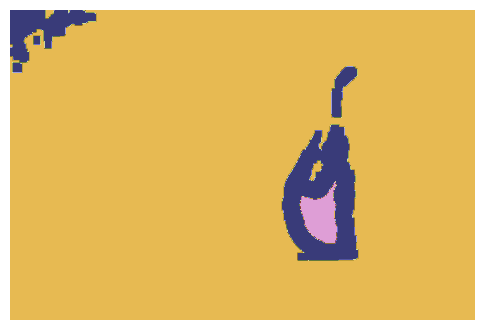

In [17]:

# Marker labelling
# sure foreground 
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that background is not 0, but 1
markers += 1
# mark the region of unknown with zero
markers[unknown == 255] = 0
 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(markers, cmap="tab20b")
ax.axis('off')
plt.show()

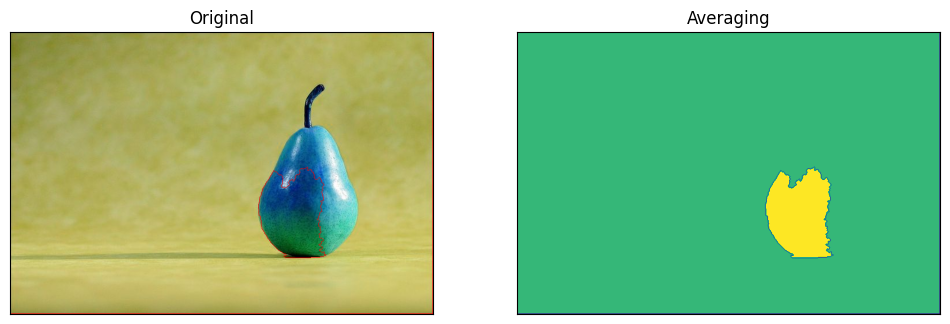

In [18]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv.watershed(img,markers)
img1 = img.copy()
img1[markers == -1] = [255,0,0]
plt.figure(figsize=(12,12))
plt.subplot(121),plt.imshow(img1),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()